<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center>
<center> <h2>Alumno : Muñoz Paxi, Gerardo Manuel</h2> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>EDA BIVARIADO</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

## <font color=#33A5FF>****1. Análisis Exploratorio de Datos - Análisis Univariado****<tfont>

## 1.1- Cargamos los datos German credit

#### Librerías

In [1]:
# importar las librerias
import pandas as pd
from qgrid import show_grid

#### Archivo `csv`

In [4]:
data=pd.read_csv("data/german_credit_data.csv", sep = ",")

# Fuente: https://www.kaggle.com/ucim1/german_credit

In [7]:
show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## 1.2.- Estado de salud de un dataframe

In [9]:
from funpymodeling.exploratory import freq_tbl, status, profiling_num

In [10]:
status(data)

variable  q_nan  p_nan  q_zeros  p_zeros  unique    type
0               Age      0  0.000        0    0.000      53   int64
1               Sex      0  0.000        0    0.000       2  object
2               Job      0  0.000       22    0.022       4   int64
3           Housing      0  0.000        0    0.000       3  object
4   Saving_accounts    183  0.183        0    0.000       4  object
5  Checking_account    394  0.394        0    0.000       3  object
6     Credit_amount      0  0.000        0    0.000     921   int64
7          Duration      0  0.000        0    0.000      33   int64
8           Purpose      0  0.000        0    0.000       8  object
9              Risk      0  0.000        0    0.000       2  object

## 13.- Variables Numéricas

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit_amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

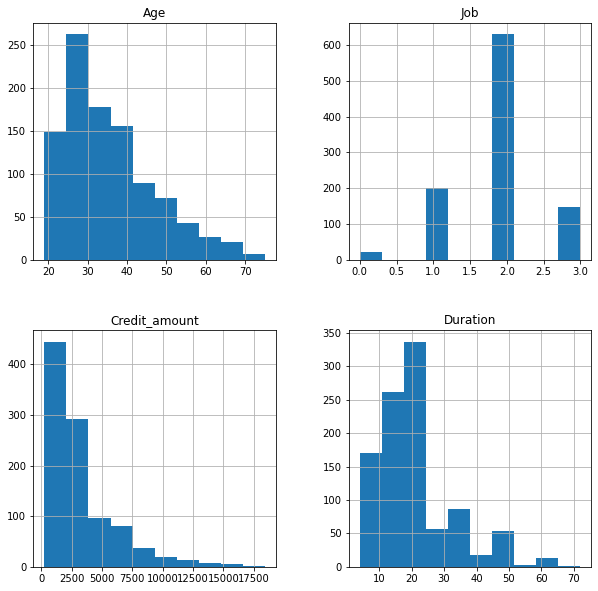

In [11]:
data.hist(figsize = (10,10))

array([[<AxesSubplot:title={'center':'Sno'}>,
        <AxesSubplot:title={'center':'Confirmed'}>],
       [<AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>]], dtype=object)

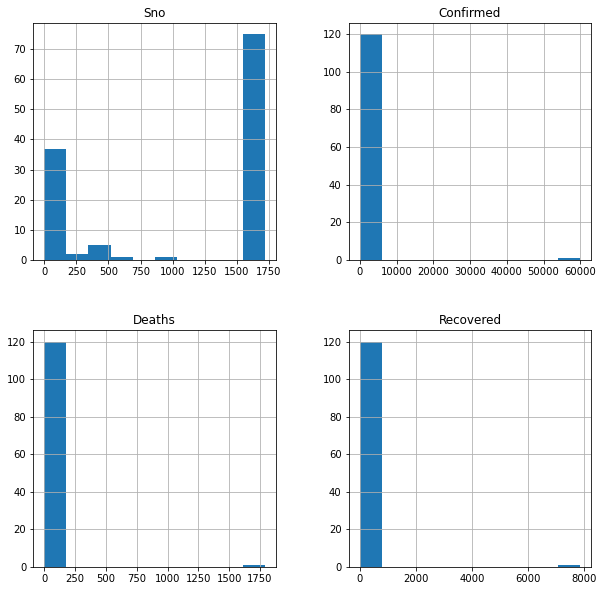

In [6]:
#Terminamos visión cualitativa de los datos
#Histogramas - Cada Variable Numérica

data.hist(figsize = (10,10))



In [12]:
data['Job']=data['Job'].astype('str')

In [13]:
status(data['Job'])

variable  q_nan  p_nan  q_zeros  p_zeros  unique    type
0      Job      0    0.0        0      0.0       4  object

### 4.- Análisis cuantitativo

In [14]:
profiling_num(data)

variable      mean      std_dev  variation_coef  p_0.01  p_0.05  \
0            Age    35.546    11.375469        0.320021   20.00   22.00   
1  Credit_amount  3271.258  2822.736876        0.862890  425.83  708.95   
2       Duration    20.903    12.058814        0.576894    6.00    6.00   

   p_0.25   p_0.5   p_0.75  p_0.95    p_0.99  
0    27.0    33.0    42.00    60.0     67.01  
1  1365.5  2319.5  3972.25  9162.7  14180.39  
2    12.0    18.0    24.00    48.0     60.00

## 4.- Análisis de Variables Categóricas

In [15]:
freq_tbl(data['Job'])

Job  frequency  percentage  cumulative_perc
0   2        630       0.630            0.630
1   1        200       0.200            0.830
2   3        148       0.148            0.978
3   0         22       0.022            1.000

In [16]:
freq_tbl(data)


      Sex  frequency  percentage  cumulative_perc
0    male        690        0.69             0.69
1  female        310        0.31             1.00

----------------------------------------------------------------

  Job  frequency  percentage  cumulative_perc
0   2        630       0.630            0.630
1   1        200       0.200            0.830
2   3        148       0.148            0.978
3   0         22       0.022            1.000

----------------------------------------------------------------

  Housing  frequency  percentage  cumulative_perc
0     own        713       0.713            0.713
1    rent        179       0.179            0.892
2    free        108       0.108            1.000

----------------------------------------------------------------

  Saving_accounts  frequency  percentage  cumulative_perc
0          little        603       0.603         0.738066
1        moderate        103       0.103         0.864137
2      quite rich         63       0.063     

### Gráfico de barras

In [21]:
from funpymodeling.exploratory import cat_vars, num_vars

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

d_plot=data
fig, ax = plt.subplots(4, 2, figsize=(20,20))
for variable, subplot in zip(cat_vars(d_plot), ax.flatten()):
    sns.countplot(y=d_plot[variable], ax=subplot, order = d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## <font color=#33A5FF>****2. Análisis Exploratorio de Datos - Análisis Bivariado****<tfont>

### ¿Cuál es la relación entre 'saving accounts' y 'housing'?(ahorros vs posee casa)

## 2.A. Categórica vs categórica

In [23]:
pd.crosstab(data.Saving_accounts, data.Risk)


Risk             bad  good
Saving_accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42

In [24]:
pd.crosstab(data.Saving_accounts, data.Risk, margins=True)

Risk             bad  good  All
Saving_accounts                
little           217   386  603
moderate          34    69  103
quite rich        11    52   63
rich               6    42   48
All              268   549  817

### Porcentages totales (suma de celdas 100%)

In [25]:
pd.crosstab(data.Saving_accounts, data.Risk, normalize='index', margins=True)

Risk                  bad      good
Saving_accounts                    
little           0.359867  0.640133
moderate         0.330097  0.669903
quite rich       0.174603  0.825397
rich             0.125000  0.875000
All              0.328029  0.671971

### Evitar sesgos por representividad (caso rich)

In [29]:
pd.crosstab(data['Saving_accounts'], data['Risk'], normalize=True, margins=True)

Risk                  bad      good       All
Saving_accounts                              
little           0.265606  0.472460  0.738066
moderate         0.041616  0.084455  0.126071
quite rich       0.013464  0.063647  0.077111
rich             0.007344  0.051408  0.058752
All              0.328029  0.671971  1.000000

## 2.B. Análisis de Numérica vs categórica

In [31]:
data.groupby('Purpose')['Age'].mean()

Purpose
business               35.484536
car                    37.139466
domestic appliances    34.250000
education              38.288136
furniture/equipment    32.458564
radio/TV               34.700000
repairs                38.545455
vacation/others        39.916667
Name: Age, dtype: float64

In [32]:
data.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
vacation/others        39.916667
repairs                38.545455
education              38.288136
car                    37.139466
business               35.484536
radio/TV               34.700000
domestic appliances    34.250000
furniture/equipment    32.458564
Name: Age, dtype: float64

In [33]:
data.groupby('Purpose')['Age'].describe()

count       mean        std   min   25%   50%    75%  \
Purpose                                                                     
business              97.0  35.484536  11.401858  21.0  27.0  33.0  39.00   
car                  337.0  37.139466  11.649960  20.0  28.0  35.0  43.00   
domestic appliances   12.0  34.250000  13.376540  22.0  24.0  28.0  39.50   
education             59.0  38.288136  11.555042  21.0  30.5  36.0  46.50   
furniture/equipment  181.0  32.458564   9.747632  19.0  25.0  30.0  39.00   
radio/TV             280.0  34.700000  11.142736  20.0  26.0  32.0  40.25   
repairs               22.0  38.545455  14.879603  22.0  25.5  33.5  48.00   
vacation/others       12.0  39.916667  11.325421  27.0  30.5  39.5  45.00   

                      max  
Purpose                    
business             74.0  
car                  75.0  
domestic appliances  62.0  
education            67.0  
furniture/equipment  63.0  
radio/TV             67.0  
repairs              67.0  
vacation/others      60.0

### Promedio de todas las variables por nuestra variable

In [34]:
data.groupby('Risk').mean()

Age  Credit_amount   Duration
Risk                                     
bad   33.963333    3938.126667  24.860000
good  36.224286    2985.457143  19.207143

## 2.B. Análisis de Numérica vs categórica

#### Opc1: Hay que discretizar una variable (numérica vs categórica)

#### Opc2: Hay que discretizar las dos (categóricavs categórica)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****3. Gráfico en Análisis Exploratorio Bivariado****<tfont>

In [38]:
import seaborn as sns

sns.boxplot (y= 'Age', x= "Purpose", data = data)

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

#### Si queremos ver mejor las distribuciones, gráfico de violín.


In [39]:
sns.violinplot(y= 'Age', x= "Purpose", data = data)


<AxesSubplot:xlabel='Purpose', ylabel='Age'>

## 3.B. Análisis categórica vs categórica

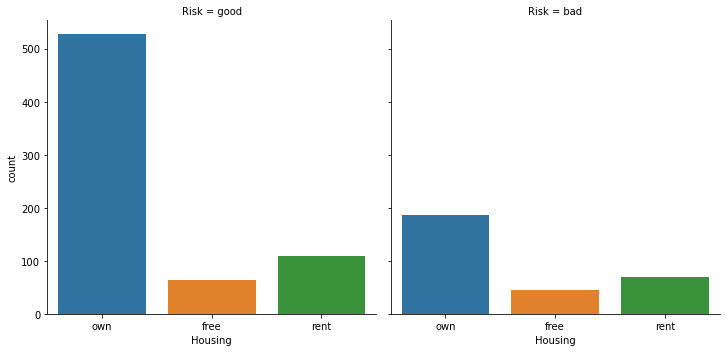

In [43]:
g = sns.catplot(x='Housing',
                col='Risk',
                data=data,
                kind='count')

#### Conceptos de:

- Análisis bivariado
- Gráficos y analítica
- Precaución con las proporciones
- Tipos de gráficos: Boxplot, scatter, barras y violín

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Documentación oficial de `seaborn`: https://seaborn.pydata.org/introduction.html

[2] ¿Por qué se carga como sns? https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns

[3] Libro de Ciencia de Datos - librería `funModeling` https://librovivodecienciadedatos.ai/

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)